In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-08-19 10:00:35.615918


<h1>Lukumäärä- ja prosenttiyhteenvedot</h1>

Tämä notebook sisältää likimain kaiken mitä sinun tarvitsee tietää lukumäärien ja prosenttien laskemisesta Pythonin pandas-kirjastoa käyttäen.

In [2]:
# Tuon tarvittavat kirjastot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

# Pylväskaavoiden prosenttiakselien tuunausta varten
from matplotlib.ticker import PercentFormatter

# Jos prosentit desimaalilukuina, niin käytän tätä akselin muotoiluun 
myFmt1 = PercentFormatter(xmax = 1, decimals = 0, symbol = ' %')

# Hos prosentit on jo valmiiksi kerrottu sadalla, niin käytän tätä akselin muotoiluun
myFmt100 = PercentFormatter(xmax = 100, decimals = 0, symbol = ' %')

In [3]:
# Avaan datan
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


<h2>Muuttujien tekstimuotoiset arvot</h2>

Muuttujien mahdolliset tektimuotoiset arvot kannattaa tallentaa lista-muuttujiin. Listoja on myöhemmin helppo lisätä tulostaulukoihin.

In [4]:
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
perhe = ['Perheetön', 'Perheellinen']
sukup = ['Mies', 'Nainen']
tyytyväisyys = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
                'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']

# Monivalintakysymyksen (mitä etuisuuksia olet käyttänyt?) vaihtoehtojen lista
monivalinnat = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

<h2>crosstab() laskee lukumäärät</h2>

<b>crosstab()</b> palauttaa tuloksena dataframen. Voin helposti luoda dataframeen uuden sarakkeen, johon lasken prosentit. 

In [5]:
df1 = pd.crosstab(df['koulutus'], 'n')

# Korvaan riviotsikot aiemmin määritellyllä koulutus-listalla
df1.index = koulutus

# Poistan vasemmasta yläkulmasta häiritsevän otsikon
df1.columns.name = ''

df1

,n
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


In [6]:
# Lisään prosentti-sarakkeen
n = df1['n'].sum()
df1['%'] = df1 / n * 100

# Muotoilen prosentit yhden desimaalin tarkkuuteen
# Tämä ei vaikuta dataframen sisältöön, vaan ainoastaan tässä tulostetun taulukon ulkoasuun
df1.style.format({'%' : '{:.1f} %'})

,n,%
Peruskoulu,27,33.3 %
2. aste,30,37.0 %
Korkeakoulu,22,27.2 %
Ylempi korkeakoulu,2,2.5 %


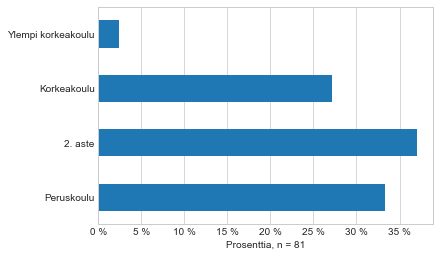

In [7]:
# Vaakapylväskaavio prosenteista
df1['%'].plot.barh()

# x-akselin otsikointi; n-arvo mukaan
plt.xlabel('Prosenttia, n = ' + str(n))

# x-akselin ticksien tuunaus
plt.gca().xaxis.set_major_formatter(myFmt100)

# Poistan vaakasuuntaisen taustaviivoituksen
plt.grid(axis = 'y')

<h2>crosstab() laskee ristiintaulukoinnit</h2>



In [8]:
# Ristiintaulukointi
df2 = pd.crosstab(df['koulutus'], df['sukup'])

# Otsikot kuntoon:
df2.index = koulutus
df2.columns = sukup

df2

,Mies,Nainen
Peruskoulu,22,5
2. aste,23,7
Korkeakoulu,15,7
Ylempi korkeakoulu,2,0


In [9]:
# Ristiintaulukointi, prosentit (normalize) sarakkeiden mukaan
df3 = pd.crosstab(df['koulutus'], df['sukup'], normalize = 'columns')

# Otsikot kuntoon
df3.index = koulutus
df3.columns = sukup

# Kikkailen n-arvot mukaan
for var in df3.columns:
    df3 = df3.rename(columns = {var : var + ', n=' + str(df2[var].sum())})

# Loppusilaus
(df3*100).style.format('{:.1f} %')

,"Mies, n=62","Nainen, n=19"
Peruskoulu,35.5 %,26.3 %
2. aste,37.1 %,36.8 %
Korkeakoulu,24.2 %,36.8 %
Ylempi korkeakoulu,3.2 %,0.0 %


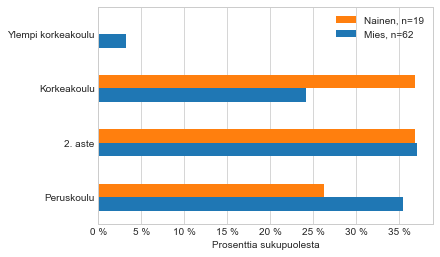

In [10]:
# Edellinen pylväinä; legend = 'reverse' kääntää selitteen järjestyksen
df3.plot.barh(legend = 'reverse')

plt.xlabel('Prosenttia sukupuolesta')

# x-akselin ticksien tuunaus
plt.gca().xaxis.set_major_formatter(myFmt1)

# Poistan vaakasuuntaisen taustaviivoituksen
plt.grid(axis = 'y')

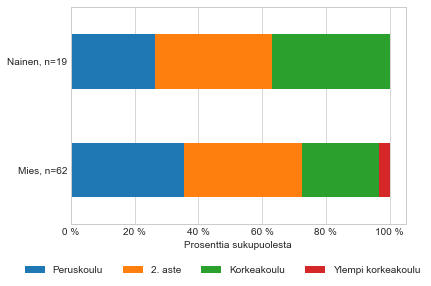

In [11]:
# Edellinen 100 % pinottuina vaakapylväinä, T vaihtaa arvosarjat ja kategoriat päittäin
df3.T.plot.barh(stacked = True)

plt.xlabel('Prosenttia sukupuolesta')

# Selitteen sijoittelu suhteessa origoon, selitteitä 4 vierekkäin
plt.legend(loc = (-0.15, -0.25), ncol = 4)
 
# x-akselin ticksien tuunaus
plt.gca().xaxis.set_major_formatter(myFmt1)

# Poistan vaakasuuntaisen taustaviivoituksen
plt.grid(axis = 'y')

<h2>Useiden muuttujien frekvenssit yhteen taulukkoon</h2>

Tässä kannattaa käyttää <b>value_counts()</b>-toimintoa.

In [12]:
# Lasken lukumääriä value_counts()-toiminnolla ja muutan tuloksen dataframeksi
df4 = df['johto'].value_counts(sort = False, normalize = True).to_frame()

# Lisään dataframeen uusia sarakkeita
df4['työtov'] = df['työtov'].value_counts(sort = False, normalize = True)
df4['työymp'] = df['työymp'].value_counts(sort = False, normalize = True)
df4['palkkat'] = df['palkkat'].value_counts(sort = False, normalize = True)
df4['työteht'] = df['työteht'].value_counts(sort = False, normalize = True)

# Riviotsikot aiemmin määritellystä tyytyväisyys-listasta
df4.index = tyytyväisyys

# Yhteensä-rivi
df4.loc['Yhteensä'] = df4.sum()

# Loppusilaus
(df4*100).style.format('{:.1f} %')

,johto,työtov,työymp,palkkat,työteht
Erittäin tyytymätön,8.5 %,nan %,11.0 %,40.2 %,6.1 %
Jokseenkin tyytymätön,19.5 %,3.7 %,11.0 %,23.2 %,18.3 %
Ei tyytymätön eikä tyytyväinen,36.6 %,19.8 %,36.6 %,23.2 %,35.4 %
Jokseenkin tyytyväinen,28.0 %,43.2 %,28.0 %,12.2 %,30.5 %
Erittäin tyytyväinen,7.3 %,33.3 %,13.4 %,1.2 %,9.8 %
Yhteensä,100.0 %,100.0 %,100.0 %,100.0 %,100.0 %


Seuraavassa lisätietoa väreistä: https://htmlcolorcodes.com/

Voit määrittää värit käyttäen värien nimiä tai värikoodeja.

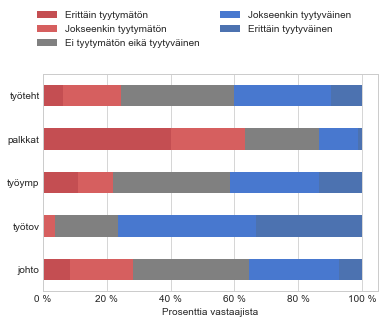

In [13]:
# Edellinen 100 % pylväinä
df4.drop('Yhteensä').T.plot.barh(stacked = True, 
                    color = ['#C44E52', '#D65F5F', 'gray', '#4878CF', '#4C72B0'])

plt.xlabel('Prosenttia vastaajista')

# Selitteen sijainti; 2 selitettä vierekkäin
plt.legend(loc = (-0.03, 1.1), ncol = 2)

# x-akselin ticksien tuunaus
plt.gca().xaxis.set_major_formatter(myFmt1)

# Poistan vaakasuuntaisen taustaviivoituksen
plt.grid(axis = 'y')

Matplotlib mahdollistaa monenlaisia toteutuksia. Seuraavassa laadin viiden kaavion yhdistelmän

- lisäparametrilla <b>subplots = True</b> määritän, että jokaisesta sarakkeesta oma kaavio
- lisäparametrilla <b>layout = (1, 5)</b> määritän, että kaaviot sijoitetaan 1 riville, 5 rinnakkain
- lisäparametreilla <b>sharex = True, sharey = True</b> määritän, että kaikilla kaavioilla on yhteiset akselit
- lisäparametrilla <b>figsize = (12, 2)</b> määritän kuvion koon
- lisäparametrilla <b>color = 'maroon'</b> määritän pylväiden väriksi maroon
- lisäparametrilla <b>legend = False</b> jätän kaavioista selitteet pois

Text(0.08, 0.5, '%')

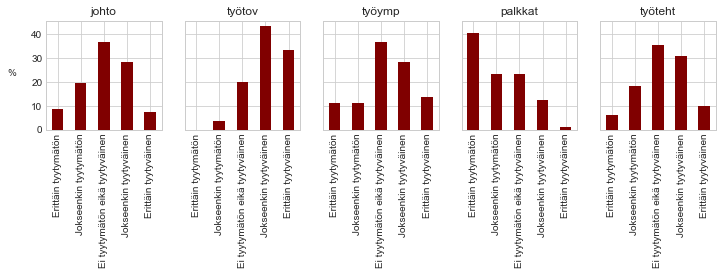

In [14]:
(df4.drop('Yhteensä') * 100).plot.bar(subplots = True, layout = (1, 5), sharex = True, sharey = True, 
              figsize = (12, 2), color = 'maroon', legend = False)

# Kuvio, jonka sisällä kaaviot sijaitsevat (gcf = get current figure)
fig = plt.gcf()
# %-merkki kuvion sijaintiin (0.08, 0.5)
fig.text(0.08, 0.5, "%")

<h2>count() laskee monivalintojen yhteenvedot</h2>

Monivalintojen yhteenveto sujuu esimerkiksi <b>count()</b>-toiminnolla. count()-toiminnon tulos ei ole dataframe, mutta voin muuttaa sen dataframeksi. Samalla voin järjestää monivalinnan vaihtoehdot valintojen mukaiseen järjestykseen <b>sort_values</b>-funktiolla.

Voin ryhmitellä tuloskset toisen muuttujan, esimerkiksi sukupuolen, mukaan <b>groupby()</b>-toiminnolla.

In [15]:
# Monivalintojen lukumäärät
df5 = df[monivalinnat].count()

# Muutan series-tyyppisen listan dataframeksi ja järjestän lukumäärien mukaiseen järjestykseen
df5 = df5.to_frame('n').sort_values(by = 'n', ascending = False)

df5

,n
työterv,47
hieroja,22
lomaosa,20
kuntosa,9


In [16]:
# Prosenttia vastaajien kokonaismäärästä (shape[0])
df5['% vastaajista'] = df5['n'] / df.shape[0] * 100

# Loppusilaus
df5.style.format({'% vastaajista':'{:.1f} %'})

,n,% vastaajista
työterv,47,57.3 %
hieroja,22,26.8 %
lomaosa,20,24.4 %
kuntosa,9,11.0 %


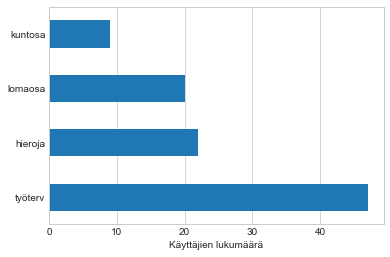

In [17]:
# Edellinen pylväinä
df5['n'].plot.barh(legend = False)

plt.xlabel('Käyttäjien lukumäärä')

# Poistan vaakasuuntaisen taustaviivoituksen
plt.grid(axis = 'y')

In [18]:
# Monivalinnat sukupuolen mukaan
df6 = df.groupby('sukup')[monivalinnat].count()

# Sukupuolet sukup-listasta, jonka määrittelin aiemmin
df6.index = sukup

df6

,työterv,lomaosa,kuntosa,hieroja
Mies,35,16,8,13
Nainen,12,4,1,9


In [19]:
# Monivalinnat sukupuolen mukaan
df7 = df.groupby('sukup')[monivalinnat].count()

# Miesten ja naisten lukumäärät
miehet = df['sukup'].value_counts()[1]
naiset = df['sukup'].value_counts()[2]

# Prosentit
# iloc[0] viittaa indeksin mukaiselle 0-riville (miesten rivi)
df7.iloc[0] = df7.iloc[0] / miehet
df7.iloc[1] = df7.iloc[1] / naiset

# Kikkailen n-arvot mukaan
df7.index = ['Mies, n=' + str(miehet), 'Nainen, n=' + str(naiset)]

# Loppusilaus
(df7*100).style.format('{:.1f} %')

,työterv,lomaosa,kuntosa,hieroja
"Mies, n=63",55.6 %,25.4 %,12.7 %,20.6 %
"Nainen, n=19",63.2 %,21.1 %,5.3 %,47.4 %


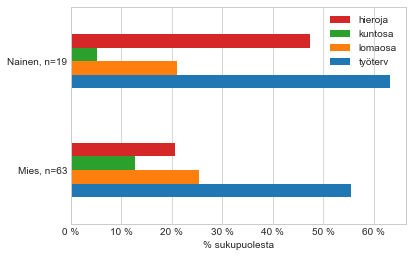

In [20]:
# Edellinen pylväinä
df7.plot.barh(legend = 'reverse')

plt.xlabel('% sukupuolesta')

# x-akselin ticksien tuunaus
plt.gca().xaxis.set_major_formatter(myFmt1)

# Poistan vaakasuuntaisen taustaviivoituksen
plt.grid(axis = 'y')

<h2>Luokiteltu jakauma</h2>

Pandas-kirjaston <b>cut</b>-toiminnolla voin luokitella muuttujan. Oletuksena luokan yläraja kuuluu luokkaan. Parametrilla <b>right = False</b> voin vaihtaa luokan alarajan kuulumaan luokkaan.

In [21]:
# Määrittelen luokkarajat palkan luokittelemiseksi
bins = [1000, 2000, 3000, 4000, 7000]

# Lisään dataan palkkaluokka-sarakkeen
df['palkkaluokka'] = pd.cut(df['palkka'], bins = bins)

# Palkkaluokkiin kuuluvien lukumäärät
df8 = pd.crosstab(df['palkkaluokka'], 'n')
df8.columns.name = ''

# Prosentit
df8['%'] = df8 / df8.sum() * 100

# Yhteensä-rivin lisäämiseksi indeksin luokkaväliarvot on ensin muuutettava merkkijonoiksi
df8.index = df8.index.astype(str)
df8.loc['Yhteensä'] = df8.sum()

# Loppusilaus
df8.style.format({'n' : '{:.0f}', '%' : '{:.1f} %'})

,n,%
palkkaluokka,,
"(1000, 2000]",19,23.2 %
"(2000, 3000]",50,61.0 %
"(3000, 4000]",8,9.8 %
"(4000, 7000]",5,6.1 %
Yhteensä,82,100.0 %


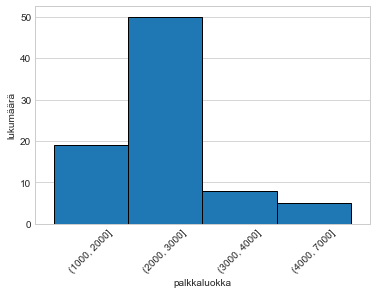

In [22]:
# Edellinen kaaviona; width = 1 laittaa pylväät kiinni toisiinsa
# rot = 45 kääntää x-akselin ticksien nimiöitä 45 astetta
df8.drop('Yhteensä')['n'].plot.bar(width = 1, rot = 45, legend = False, edgecolor = 'black')

plt.ylabel('lukumäärä')

# Poistan pystysuuntaisen taustaviivoituksen
plt.grid(axis = 'x')

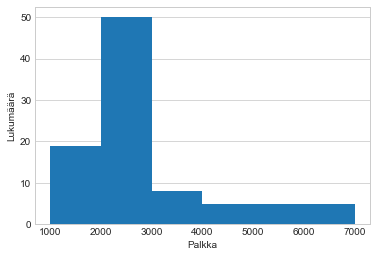

In [23]:
# Nopein tapa luokitellun jakauman tarkasteluun on hist-kaavio
df['palkka'].hist(bins = bins)

plt.xlabel('Palkka')
plt.ylabel('Lukumäärä')

# Poistan pystysuuntaisen taustaviivoituksen
plt.grid(axis = 'x')

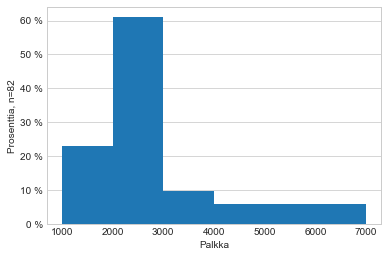

In [24]:
# np.ones kikalla prosentit hist-kaavioon
# np.ones tuottaa n kpl ykkösiä, jolloin jokaiselle luokalle tulee painoksi 1 / n

# Histogrammi, jossa y-akselilla prosentit
n = df['palkka'].count()

df['palkka'].hist(bins = bins, weights = np.ones(n) / n)

plt.xlabel('Palkka')
plt.ylabel('Prosenttia, n='+str(n))

# x-akselin ticksien tuunaus
plt.gca().yaxis.set_major_formatter(myFmt1)

# Poistan pystysuuntaisen taustaviivoituksen
plt.grid(axis = 'x')

<h2>Lisätietoa</h2>

- https://nbviewer.jupyter.org/github/taanila/kuvaileva/blob/main/value_counts.ipynb

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/